<a href="https://colab.research.google.com/github/fidanismayilzada23/ML-Projects/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X_iris,y_iris)
tree_clf.score(X_iris,y_iris)

0.96

In [3]:
X_iris.shape

(150, 2)

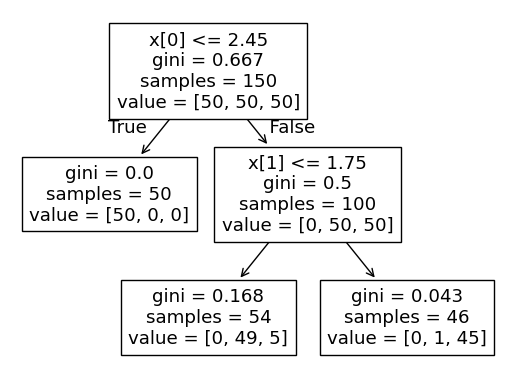

In [5]:
tree.plot_tree(tree_clf);

In [6]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X_moons,y_moons=make_moons(n_samples=100,noise=0.2,random_state=42)

tree_clf1=DecisionTreeClassifier(random_state=42)
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5,random_state=42)

tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

#DecisionTree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X_quad=np.random.rand(200,1)-0.5
y_quad=X_quad**2+0.025*np.random.randn(200,1)

tree_reg=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X_quad,y_quad)
tree_reg.score(X_quad,y_quad)

0.7966018355059642

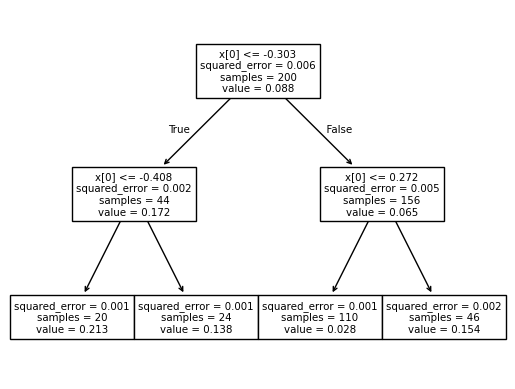

In [10]:
tree.plot_tree(tree_reg);

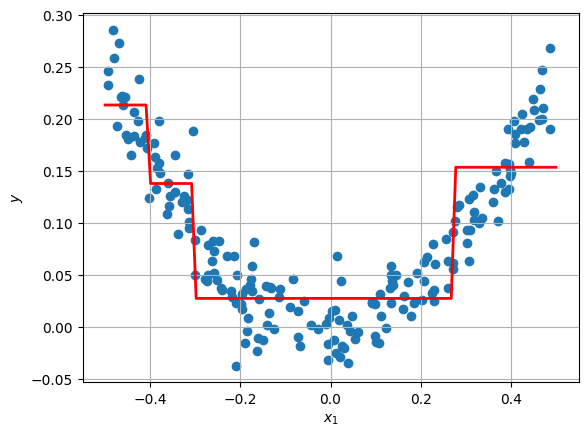

In [11]:
X_new=np.linspace(-0.5,0.5,100).reshape(-1,1)
y_pred=tree_reg.predict(X_new)
plt.scatter(X_quad,y_quad)
plt.plot(X_new,y_pred,"r-",linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.grid()
plt.show();

#Tapsırıq

In [12]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X_moons,y_moons=make_moons(n_samples=100,noise=0.4,random_state=42)

X_moons_train,X_moons_test,y_moons_train,y_moons_test=train_test_split(X_moons,y_moons,test_size=0.2,random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
dec_tree= make_pipeline(DecisionTreeClassifier(random_state=42))

In [26]:
dec_tree.fit(X_moons_train,y_moons_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [25]:
dec_tree.score(X_moons_train,y_moons_train),dec_tree.score(X_moons_test,y_moons_test)

(1.0, 0.7)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid={"decisiontreeclassifier__max_depth":[3,4,5,6,7],
            'decisiontreeclassifier__min_samples_leaf':[5,10,20,30,50],
            'decisiontreeclassifier__max_leaf_nodes':[5,10,20,30,50]}

In [29]:
grid_search=GridSearchCV(dec_tree,param_grid,cv=3)
grid_search.fit(X_moons_train,y_moons_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 7],
                         'decisiontreeclassifier__max_leaf_nodes': [5, 10, 20,
                                                                    30, 50],
                         'decisiontreeclassifier__min_samples_leaf': [5, 10, 20,
                                                                      30, 50]})

In [30]:
grid_search.best_estimator_.fit(X_moons_train,y_moons_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [31]:
grid_search.score(X_moons_train,y_moons_train)

0.825

In [33]:
grid_search.score(X_moons_test,y_moons_test)

0.8